In [67]:
import numpy as np
import pandas as pd

#read the csv file using pandas
d=pd.read_csv(r"C:/Users/tamil/food_expiry_dataset.csv")
d.head()

,Food_type,Packaging,Storage_temperature,Preservatives,Expiry_days
0,Snack,Vacuum,17,No,203
1,Fruit,Vacuum,7,No,5
2,Bakery,Glass,21,No,4
3,Snack,Paper,3,Yes,68
4,Vegetable,Paper,10,No,2


In [42]:
#summary of the DataFrame
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Food_type            100000 non-null  object
 1   Packaging            100000 non-null  object
 2   Storage_temperature  100000 non-null  int64 
 3   Preservatives        100000 non-null  object
 4   Expiry_days          100000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [43]:
#show the first 5 rows
d.head()

,Food_type,Packaging,Storage_temperature,Preservatives,Expiry_days
0,Snack,Vacuum,17,No,203
1,Fruit,Vacuum,7,No,5
2,Bakery,Glass,21,No,4
3,Snack,Paper,3,Yes,68
4,Vegetable,Paper,10,No,2


In [44]:
#count the null values in the file
d.isnull().sum()

Food_type              0
Packaging              0
Storage_temperature    0
Preservatives          0
Expiry_days            0
dtype: int64

In [45]:
#Finds the most frequently occurring value (the mode)
preserve=d["Preservatives"].mode()
print(preserve)
#that can be used to fill the null values

0    Yes
Name: Preservatives, dtype: object


In [46]:

#Finds the median (middle value) of the numeric column
ex=d["Expiry_days"].median()
print(ex)
#that can be used to fill the null values

7.0


In [47]:
#Data preprocessing

from sklearn.preprocessing import LabelEncoder
lable_food_type=LabelEncoder()
lable_packaging=LabelEncoder()
lable_preservatives=LabelEncoder()

#convert the string into numeric value ,because ML cannot understand the string
d["Food_type"]=lable_food_type.fit_transform(d["Food_type"])
d["Packaging"]=lable_packaging.fit_transform(d["Packaging"])
d["Preservatives"]=lable_preservatives.fit_transform(d["Preservatives"])

#print the d
d

,Food_type,Packaging,Storage_temperature,Preservatives,Expiry_days
0,5,4,17,0,203
1,3,4,7,0,5
2,0,0,21,0,4
3,5,2,3,1,68
4,6,2,10,0,2
...,...,...,...,...,...
99995,3,3,12,1,8
99996,2,1,29,0,4
99997,6,1,4,1,8
99998,4,2,16,0,8


In [48]:
#Removes the Expiry_days column from DataFrame d
x=d.drop(['Expiry_days'],axis=1)

#Selects only the Expiry_days column.
y=d['Expiry_days']

In [49]:
#Splits your dataset into training set and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
x_test.head()


,Food_type,Packaging,Storage_temperature,Preservatives
75721,4,0,23,1
80184,0,1,17,1
19864,3,2,16,1
76699,3,3,25,0
92991,3,4,14,1


In [51]:
y_test.head()


75721     5
80184     3
19864     7
76699     2
92991    10
Name: Expiry_days, dtype: int64

In [52]:
x_train.head()


,Food_type,Packaging,Storage_temperature,Preservatives
75220,4,1,3,0
48955,0,3,21,1
44966,6,2,14,1
13568,5,0,28,1
92727,2,2,20,1


In [53]:
#An ensemble model that builds multiple decision trees and averages their predictions 
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [54]:
#using your trained Random Forest Regressor to make predictions
y_pred=model.predict(x_test)
y_pred

array([  5.55539326,   2.6529881 ,   5.46541765, ...,   4.4001245 ,
       210.6856601 , 260.07298827])

In [55]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [56]:
#Average of absolute differences between actual and predicted values
mae

14.10909885506272

In [57]:
#Square root of average squared errors.
rmse

np.float64(30.202579006464173)

In [58]:
#Measures how much variance
m=r2*100
round(m)

80

In [59]:
#compare the y_test and y_pred
results = pd.DataFrame({
    "Actual Expiry": y_test.values[:20],
    "Predicted Expiry": np.round(y_pred[:20], 2)
})
print(results.head())

   Actual Expiry  Predicted Expiry
0              5              5.56
1              3              2.65
2              7              5.47
3              2              3.15
4             10              5.96


In [29]:


#added model saving & loading using joblib
import joblib
joblib.dump(model,"Predicted Expiry Days.pkl")
loaded_model=joblib.load("Predicted Expiry Days.pkl")

y_pred=loaded_model.predict([[6,2,14,1]])
y_pred[0]


C:\Users\tamil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(5.632411458270005)

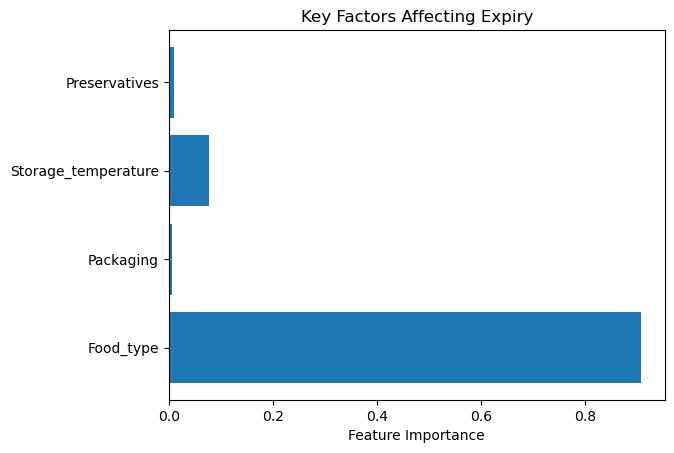

In [61]:
import matplotlib.pyplot as plt
#visualizing feature importance from the Random Forest model
importances=model.feature_importances_
features=x.columns
plt.barh(features,importances)
plt.xlabel("Feature Importance")
plt.title("Key Factors Affecting Expiry")
plt.show()

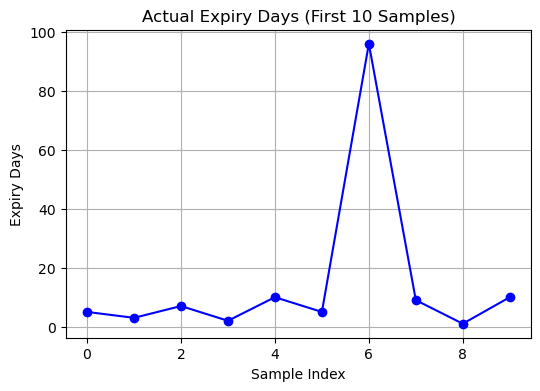

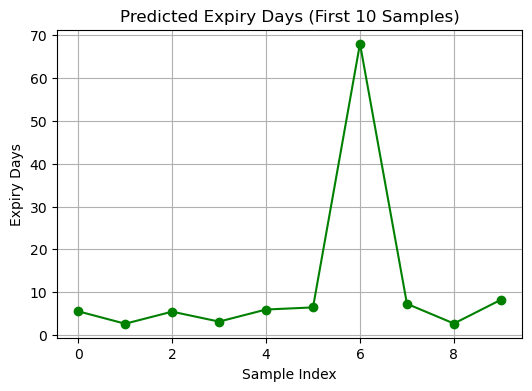

In [62]:

#compare the graph of actual and predict

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
d = pd.read_csv(r"C:/Users/tamil/food_expiry_dataset.csv")

#  Plot Actual Expiry Days (first 10 samples)
plt.figure(figsize=(6,4))
plt.plot(y_test[:10].values, marker="o", color="blue")
plt.title("Actual Expiry Days (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Expiry Days")
plt.grid(True)
plt.show()


# Plot Predicted Expiry Days (first 10 samples)
plt.figure(figsize=(6,4))
plt.plot(y_pred[:10], marker="o", color="green")
plt.title("Predicted Expiry Days (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Expiry Days")
plt.grid(True)
plt.show()

In [64]:
food_type=input("food type:")
packaging=input("pack type:")
temperature=input("temp type:")
preservative=input("preserv type:")


input_data=pd.DataFrame([{
    "Food_type":food_type,
    "Packaging":packaging,
    "Storage_temperature":temperature,
    "Preservatives":preservative}])

predicted_expiry=model.predict(input_data)
print("Predicted Expiry Days:", round(predicted_expiry[0], 2))



food type: 6
pack type: 2
temp type: 14
preserv type: 1


Predicted Expiry Days: 5.63


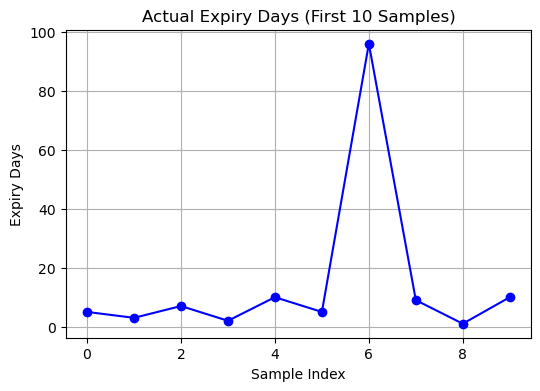

In [65]:
plt.figure(figsize=(6,4))
plt.plot(y_test[:10].values, marker="o", color="blue")
plt.title("Actual Expiry Days (First 10 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Expiry Days")
plt.grid(True)
plt.show()